### Ejercicio 1:

Mediante un algoritmo genético desarrollado en Python encontrar el valor máximo de la función
$
y=x^2
$
a. Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 10 lanzamientos del algoritmo.
Parámetros:

- Selección por ruleta
- Intervalo de la variable de decisión: [0,31] ∈ Z
- Aplicar elitismo: Sí
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.92
- Probabilidad de mutación: 0.1
- Tamaño de la población: 4
- Generaciones 10


In [1]:
# set for reproducibility
import random

import numpy as np

random.seed(42)

In [2]:
from EvolutionaryAlgorithm import Roulette
import pandas as pd

executions = 10
df = pd.DataFrame()
for run in range(executions):

    ea = Roulette(
        generations=10,
        chromosome_length=5,
        population_length=4,
        maximize=True,
        target_fn=lambda x:x**2,
        elitism=True,
        crossover_rate=0.92,
        x_min=0,
        x_max=31,
        mutation_rate=0.1
    )
    ea.execute()
    chromosome, best, fitness = ea.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)      
    
display(df)

,run,best chromosome,best solution,fitness
0,0,11111,31.0,961.0
1,1,11111,31.0,961.0
2,2,11111,31.0,961.0
3,3,11111,31.0,961.0
4,4,11101,29.0,841.0
5,5,11111,31.0,961.0
6,6,11111,31.0,961.0
7,7,11111,31.0,961.0
8,8,11101,29.0,841.0
9,9,11111,31.0,961.0


## Ejercicio 2
Minimizar mediante tres algoritmos genéticos desarrollados en Python la función $
y=x^2
$
a. Indicar el resultado de la solución encontrada (valor de "x") si se ejecutan 3 algoritmos un total de 30 lanzamientos cada uno.
Parámetros:
- Selección por Ranking, Ruleta y Torneo
- Intervalo de la variable de decisión: [-31,31] ∈ R (con un dígito decimal)
- Aplicar elitismo: Sí (Sólo en método ruleta y ranking)
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce: 0.85
- Probabilidad de mutación: 0.09
- Tamaño de la población: 4
- Generaciones 10

In [3]:
from EvolutionaryAlgorithm import Roulette
import pandas as pd
import math

executions = 30
x_max = 31
x_min = -31
crossover_rate = 0.85
mutation_rate = 0.09

decimal_places = 1 # .1
bits = math.ceil(np.log2((x_max-x_min) * (10**decimal_places)))

df_roulette = pd.DataFrame()
for run in range(executions):

    eaRoulette = Roulette(
        generations=10,
        chromosome_length=bits, 
        population_length=4,
        maximize=True,
        target_fn=lambda x:x**2,
        elitism=True,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaRoulette.execute()
    chromosome, best, fitness = eaRoulette.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_roulette = pd.concat([df_roulette, pd.DataFrame([row])], ignore_index=True)      
    
display(df_roulette)

,run,best chromosome,best solution,fitness
0,0,0000001001,-30.454545,927.479339
1,1,1111111001,30.636364,938.586777
2,2,0000000010,-30.878788,953.499541
3,3,0000000000,-31.000000,961.000000
4,4,1111111011,30.757576,946.028466
5,5,0000000000,-31.000000,961.000000
6,6,0000000000,-31.000000,961.000000
7,7,1111101011,29.787879,887.317723
8,8,0000000001,-30.939394,957.246097
9,9,1111111110,30.939394,957.246097


In [4]:
from EvolutionaryAlgorithm import LinearRanking
df_linear_ranking = pd.DataFrame()
for run in range(executions):

    eaLinearRanking = LinearRanking(
        generations=10,
        chromosome_length=bits, 
        population_length=4,
        maximize=True,
        target_fn=lambda x:x**2,
        elitism=True,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaLinearRanking.execute()
    chromosome, best, fitness = eaLinearRanking.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_linear_ranking = pd.concat([df_linear_ranking, pd.DataFrame([row])], ignore_index=True)      
    
display(df_linear_ranking)

,run,best chromosome,best solution,fitness
0,0,0000000000,-31.000000,961.000000
1,1,0000001000,-30.515152,931.174472
2,2,0000000000,-31.000000,961.000000
3,3,1111101111,30.030303,901.819100
4,4,1111111111,31.000000,961.000000
5,5,1111111111,31.000000,961.000000
6,6,1111110111,30.515152,931.174472
7,7,0000001100,-30.272727,916.438017
8,8,1111111111,31.000000,961.000000
9,9,0000000001,-30.939394,957.246097


In [5]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()
for run in range(executions):

    eaTournament = Tournament(
        tournament_size=3,
        generations=10,
        chromosome_length=bits, 
        population_length=4,
        maximize=True,
        target_fn=lambda x:x**2,
        elitism=False,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaTournament.execute()
    chromosome, best, fitness = eaTournament.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      
    
display(df_tournament)

,run,best chromosome,best solution,fitness
0,0,1110000111,23.727273,562.983471
1,1,1011110011,14.757576,217.786042
2,2,0000011110,-29.181818,851.578512
3,3,1110101011,25.909091,671.280992
4,4,1101001111,20.333333,413.444444
5,5,1110111001,26.757576,715.967860
6,6,1111100001,29.181818,851.578512
7,7,0000101101,-28.272727,799.347107
8,8,1110100110,25.606061,655.670340
9,9,1101010101,20.696970,428.364555


b. (Valor 0.75 puntos) Completar la siguiente tabla en base a las 30
ejecuciones con los parámetros señalados.

In [6]:
comparison = pd.DataFrame()
algorithms = ['LinearRanking', 'Roulette', 'Tournament']
for dataframe, algorithm in zip([df_linear_ranking, df_roulette, df_tournament], algorithms):
    row = {'algorithm': algorithm }
    desc = dataframe['best solution'].describe()
    for statistic in ['min', 'mean', 'max', 'std']:
        row[statistic] = desc[statistic]
    comparison = pd.concat([comparison, pd.DataFrame([row])], ignore_index=True)     
    
display(comparison)

,algorithm,min,mean,max,std
0,LinearRanking,-31.000000,2.191919,31.000000,31.100985
1,Roulette,-31.000000,-2.191919,31.000000,31.056343
2,Tournament,-30.515152,2.442424,30.454545,26.033100


c. (Valor 0.75 puntos) Explicar (en el .pdf) una interpretación de los
resultados obtenidos en el ítem anterior.

Dada la tabla se puede observar lo siguiente: 
- En los 3 tipos de selecciones se obtiene un máximo y minimo de -31 y 31. 
- Es decir que la solución puede no ser única pero aún así el algoritmo encuentra una. 
- Es normal que las soluciones tiendan a los extremos ya que los bits más significativos van a ser los que tengan más fitness (es decir que siempre, no importa el algoritmo, tarde o temprano la mayoría de las tiradas van a converger a este tipo de solución).
- La velocidad de convergencia hacia un posible máximo si se podría ver afectada por el algoritmo de selección.
- El algoritmo de selección Tournament de hecho no llegó a ninguna de las dos soluciones con lo cual la evidencia sugiere que es el peor de los 3.




d. (Valor 1 punto) Modificar los parámetros Pm, Tamaño de la población y
Generaciones de modo tal que se consiga encontrar una combinación
que permita obtener el mejor valor óptimo y su correspondiente solución
(para cada algoritmo habrá una combinación diferente). Transcribir las
combinaciones encontradas en el .pdf.



Con Roulette y Linear Ranking se consiguió las dos posibles soluciones óptimas con:
- Pm=0.09
- Generaciones=10
- Tamaño de población=4

Así que resta conseguir para Tournament.

In [7]:
from EvolutionaryAlgorithm import Tournament
df_tournament = pd.DataFrame()
for run in range(executions):

    eaTournament2 = Tournament(
        tournament_size=3,
        generations=30,
        chromosome_length=bits, 
        population_length=10,
        maximize=True,
        target_fn=lambda x:x**2,
        elitism=False,
        crossover_rate=crossover_rate,
        x_min=x_min,
        x_max=x_max,
        mutation_rate=mutation_rate
    )
    eaTournament2.execute()
    chromosome, best, fitness = eaTournament2.get_best_individual()
    row = {"run": run, "best chromosome": chromosome,  "best solution": best, "fitness": fitness}
    df_tournament = pd.concat([df_tournament, pd.DataFrame([row])], ignore_index=True)      
    
display(df_tournament)

,run,best chromosome,best solution,fitness
0,0,0010000110,-22.878788,523.438935
1,1,1111100000,29.121212,848.044995
2,2,1111011111,29.060606,844.518825
3,3,0000001011,-30.333333,920.111111
4,4,0000010011,-29.848485,890.932048
5,5,1110000010,23.424242,548.695133
6,6,1110110111,26.636364,709.495868
7,7,0000010010,-29.909091,894.553719
8,8,0000100011,-28.878788,833.984389
9,9,1111000101,27.484848,755.416896


Después de cambiar 
- Generaciones: 30
- Tamaño de población:4 

el algoritmo llegó a la solución óptima.

e. (Valor 0.5 puntos) Realizar 6 curvas de convergencia; 3 correspondientes
a los algoritmos con los parámetros originales y 3 correspondientes a los
algoritmos con los mejores parámetros encontrados en el ítem d. Mostrar
las 6 curvas en el .pdf. Las curvas deben contener título, leyenda y
etiquetas en los ejes.



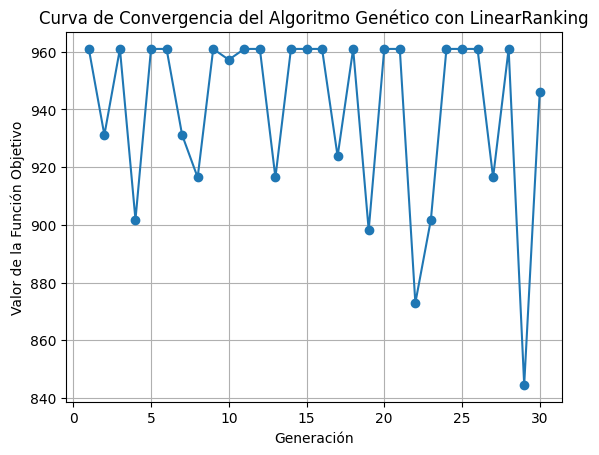

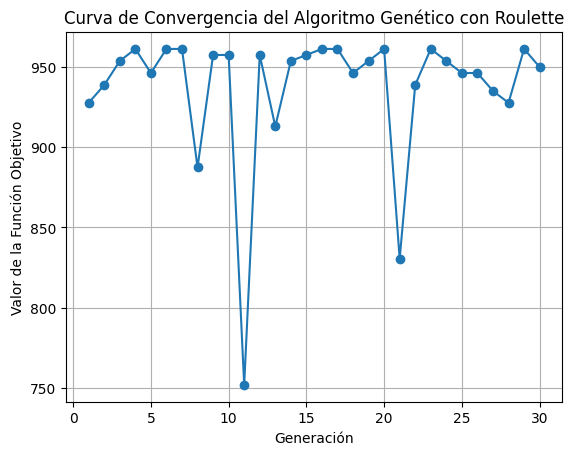

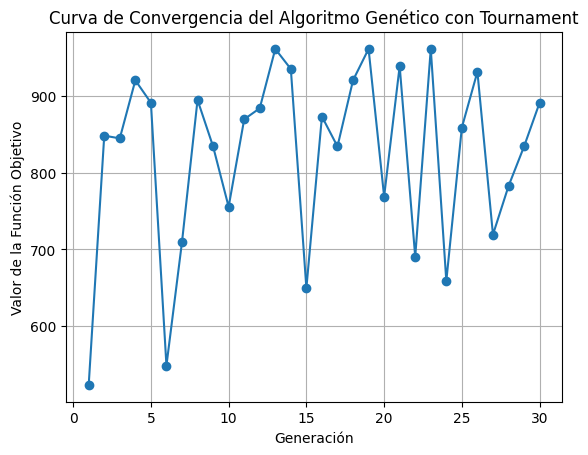

In [19]:
import matplotlib.pyplot as plt
for df, algorithm in zip([df_linear_ranking, df_roulette, df_tournament], algorithms):
    x = df['run']
    y = df['best solution']
    plt.plot(range(1, len(x) + 1), [w**2 for w in y], marker='o')
    plt.xlabel('Generación')
    plt.ylabel('Valor de la Función Objetivo')
    plt.title(f'Curva de Convergencia del Algoritmo Genético con {algorithm}')
    plt.grid(True)
    plt.show()

f. (Valor 0.5 puntos) Interpretar tanto las combinaciones de parámetros
encontradas en cada uno de los 3 algoritmos como sus graficas de
convergencia en el ítem anterior y explicarlas en el .pdf.